In [1]:
from tqdm import tqdm
import pandas as pd
import os

- 뉴스 전체 파일들 불러와서 키워드 적용하여 필터링 후 뉴스 저장

In [2]:
keywords = ["부동산", "건설"]
# keywords_1 = ["부동산", "건설", "건축"]
# keywords_2 = ["경기", "철강", "시멘트", "공사", "금리"]

In [3]:
files_all = os.listdir("./news")

In [4]:
files = [f for f in files_all if "2019" in f]
files

['news_content_2019-01.csv',
 'news_content_2019-02.csv',
 'news_content_2019-03.csv',
 'news_content_2019-04.csv',
 'news_content_2019-05.csv',
 'news_content_2019-06.csv',
 'news_content_2019-07.csv',
 'news_content_2019-08.csv',
 'news_content_2019-09.csv',
 'news_content_2019-10.csv',
 'news_content_2019-11.csv',
 'news_content_2019-12.csv']

In [6]:
# year = "2019"

for year in ["2017", "2018", "2019", "2020", "2021", "2022", "2023"]:
# for year in ["2017", "2018", "2019", "2020", "2021", "2022"]:
# for year in ["2023"]:
    files = [f for f in files_all if year in f]
    print(year, len(files))
    datas = []
    for file in tqdm(files[:]):
        df = pd.read_csv(f"./news/{file}", lineterminator='\n')
        df = df.loc[df["content"].dropna().index, :]

        rows = []  # count한 series 저장
        words = []  # count할 단어들 저장

        for word in keywords:
            word_count = df.set_index("news_id")["content"].str.count(word)
            rows.append(word_count)
            words.append(word)

        temp = pd.concat(rows, axis=1)
        temp.columns = words
        temp = temp.loc[temp.sum(axis=1) >= 1, :].copy()

        # 뉴스 기사와 데이터를 merge하고, sid2, date, content 컬럼만 합칠때 남기기
        temp = pd.merge(temp, df.set_index("news_id"), left_index=True, right_index=True)
        temp = temp.drop(["sid1", "page_url", "press", "title", "input_date"], axis=1)

        datas.append(temp)
        # temp

    news = pd.concat(datas)
    news["length"] = news["content"].apply(len)  # 글자수 추가
    news.to_csv(f"./news_sdc/{year}_news.csv")

2017 12


100%|██████████| 12/12 [01:28<00:00,  7.34s/it]


2018 12


100%|██████████| 12/12 [01:40<00:00,  8.40s/it]


2019 12


100%|██████████| 12/12 [01:43<00:00,  8.64s/it]


2020 12


100%|██████████| 12/12 [01:49<00:00,  9.14s/it]


2021 12


100%|██████████| 12/12 [01:52<00:00,  9.36s/it]


2022 12


100%|██████████| 12/12 [01:45<00:00,  8.82s/it]


In [7]:
news

,부동산,건설,sid2,date,content,length
news_id,,,,,,
9,1,0,259,20220101,[서울경제] A씨는 2020년초 신종 코로나 바이러스 감염증(코로나 19) 사태로 ...,2600
10,3,0,259,20220101,"기재부, 세법개정 후속 시행령 개정방안 오는 6일 발표\n\n\n\n기획재정부는 지...",1081
19,4,0,259,20220101,"[신년인터뷰] ""가계부채 부실·빅테크 영향력 확대가 최대 위협요인""""금융업 본질에 ...",4439
20,1,0,259,20220101,"“MZ세대·글로벌 시장 공략…비은행 강화도 주요 과제”대선주자들 향해 ""금융산업 발...",3167
28,1,0,259,20220101,'가계대출 관리 모범생'으로 꼽혔던 신한은행의 가계대출 증가율이 지난해 7%를 웃돌...,1415
...,...,...,...,...,...,...
1724751,4,0,263,20221231,2·3위 금·원자재…후순위는 비트코인·한국주식·미국주식\n\n\n\n올해 가장 높은...,1065
1724752,0,7,263,20221231,새 살림집 건설 소식 보도…지난 29~30일 입주 모임 진행\n\n\n\n(평양 노...,1044
1724756,0,2,263,20221231,기사내용 요약지속되는 복합위기 속 세계경제도 암울…북한 도발도 악재역대급 경제위기에...,4758


In [ ]:
# df

In [ ]:
# df.loc[df["length"] > 2000, :]

In [ ]:
# file = 'news_content_2020-01.csv'

In [ ]:
# df = pd.read_csv(f"./news/{file}", low_memory=False)
# df

In [ ]:
# df.info()

In [ ]:
# df = df.loc[df["content"].dropna().index, :]

In [ ]:
# rows = []  # count한 series 저장
# words = []  # count할 단어들 저장

# for word in keywords_1:
#     word_count = df.set_index("news_id")["content"].str.count(word)
#     rows.append(word_count)
#     words.append(word)

# for word in keywords_2:
#     word_count = df.set_index("news_id")["content"].str.count(word)
#     rows.append(word_count)
#     words.append(word)

In [ ]:
# word_count 한걸 데이터프레임으로 변경 후, 1개 이상 등장한 데이터만 남기기
# temp = pd.concat(rows, axis=1)
# temp.columns = words
# temp = temp.loc[temp.sum(axis=1) >= 1, :].copy()

# 뉴스 기사와 데이터를 merge하고, sid2, date, content 컬럼만 합칠때 남기기
# temp = pd.merge(temp, df.set_index("news_id"), left_index=True, right_index=True)
# temp = temp.drop(["sid1", "page_url", "press", "title", "input_date"], axis=1)
# temp

In [ ]:
# pd.concat([old, temp])

In [ ]:
# df.loc[df["sid2"] == 260, :]

In [9]:
# 필터한 뉴스 데이터 중 기사 제외하고 불러오기
files = os.listdir("./news_sdc")

In [11]:
dfs = []
for file in tqdm(files):
    df = pd.read_csv(f"./news_sdc/{file}")
    df = df.drop("content", axis=1).copy()
    dfs.append(df)

100%|██████████| 7/7 [02:20<00:00, 20.11s/it]


In [13]:
merged = pd.concat(dfs)
merged.to_csv("filtered_news_lists.csv", index=False)

In [14]:
merged

,news_id,부동산,건설,sid2,date,length
0,7058112,0,1,259,20170101,939
1,7058113,2,0,259,20170101,1951
2,7058139,1,0,259,20170101,1176
3,7058152,1,0,259,20170101,1520
4,7058167,1,0,259,20170101,2206
...,...,...,...,...,...,...
98288,14062168,0,1,263,20230531,1146
98289,14062170,2,0,263,20230531,2140
98290,14062174,0,4,263,20230531,713
98291,14062175,4,0,263,20230531,1302


In [15]:
temp = merged.copy()
temp = temp.loc[temp["length"] >= 2000, :]
temp.to_csv("filtered_news_lists_2000.csv", index=False)

In [16]:
temp

,news_id,부동산,건설,sid2,date,length
4,7058167,1,0,259,20170101,2206
7,7058186,1,0,259,20170101,4009
19,7058237,4,0,259,20170101,2943
23,7058273,2,0,259,20170101,2104
24,7058297,4,10,259,20170101,2062
...,...,...,...,...,...,...
98260,14061942,0,1,263,20230531,2153
98261,14061952,12,1,263,20230531,3345
98273,14062032,7,5,263,20230531,2411
98275,14062065,2,0,263,20230531,2276


<Axes: xlabel='ym'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fi

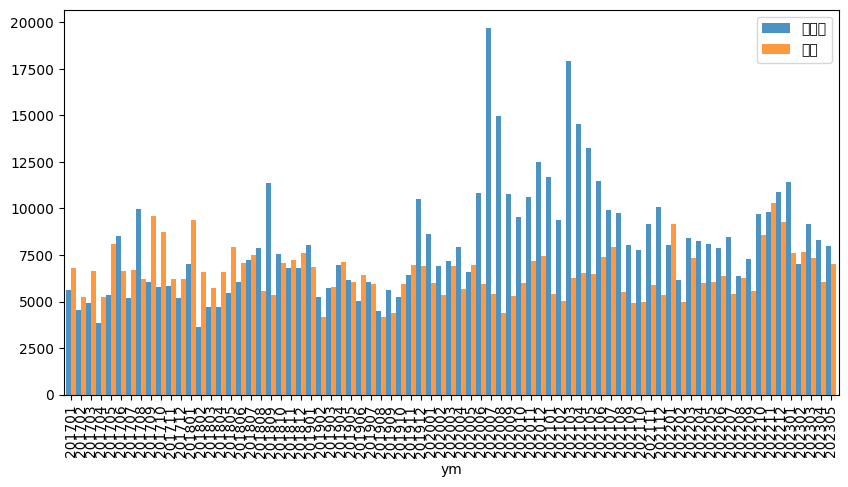

In [32]:
temp["ym"] = temp["date"].astype(str).str[:6]
grp = temp.groupby("ym")
grp[["부동산", "건설"]].sum().plot.bar(figsize=(10, 5), width=1, alpha=0.8)

<Axes: xlabel='ym'>

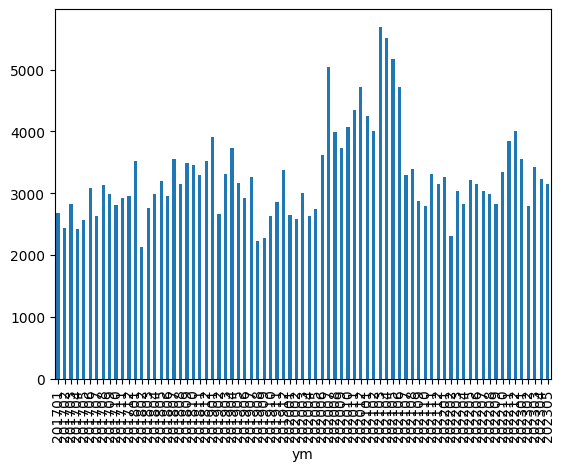

In [26]:
grp["news_id"].count().plot.bar()